In [1]:
# !pip install opencv-python
import os
import cv2
import matplotlib.pyplot as plt

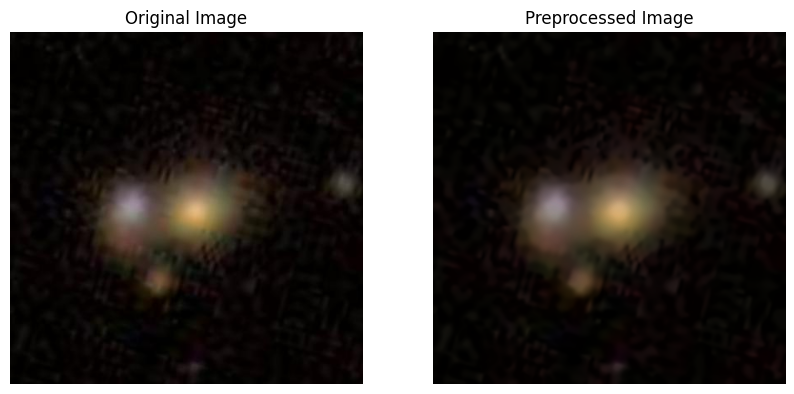

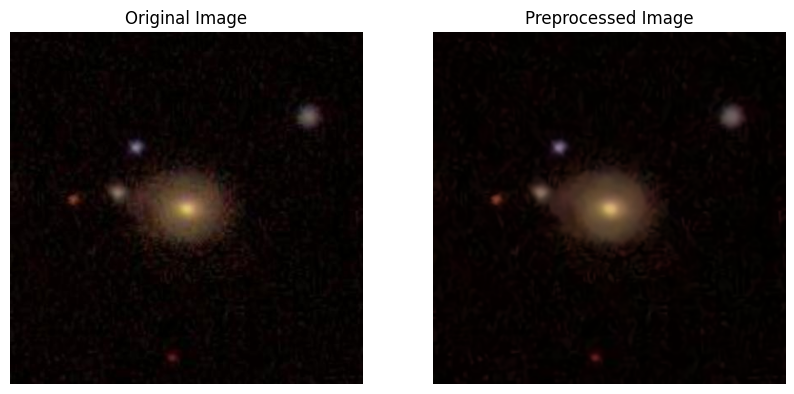

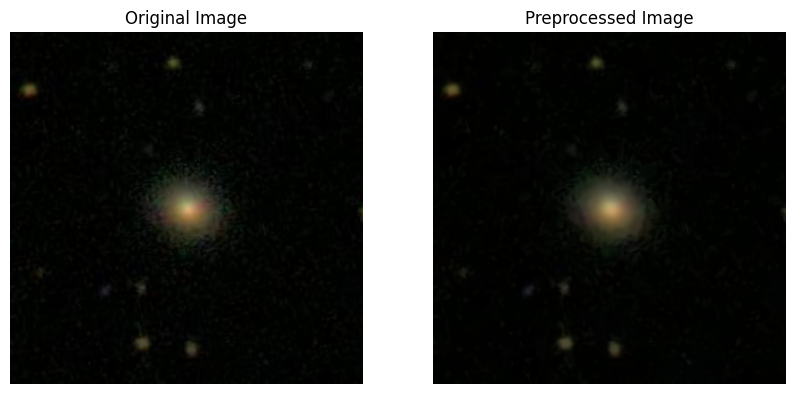

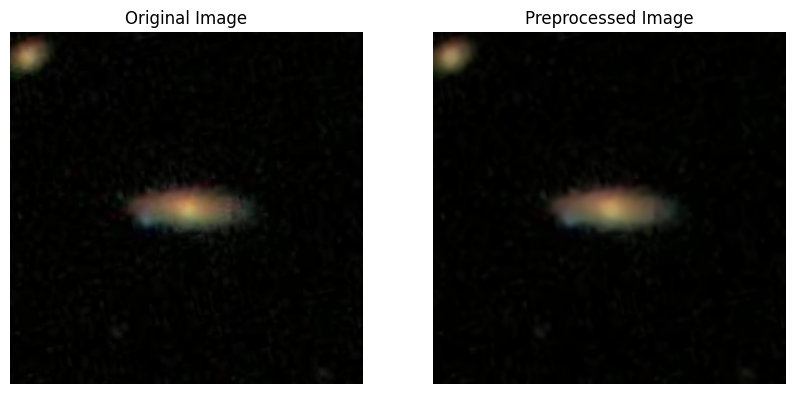

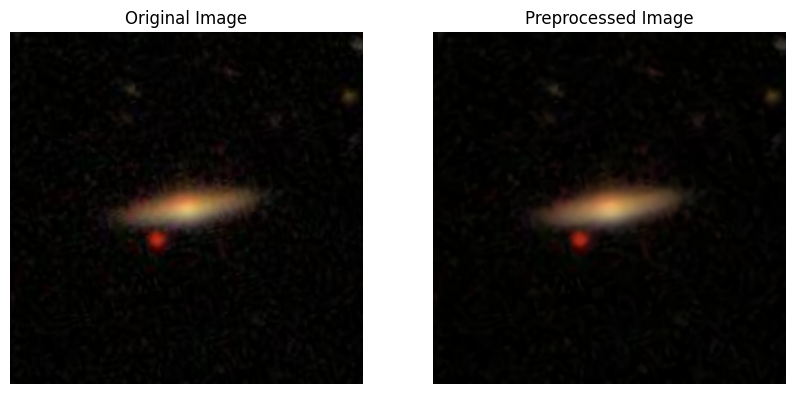

In [ ]:
def preprocess_image(path):
    img = cv2.imread(path)
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)  # Denoising
    # img = cv2.GaussianBlur(img, (5, 5), 0)  # Gaussian blur
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return img

img_dir = './data2/test_images/test_images/'

img_list = os.listdir(img_dir)
img_list = [img for img in img_list if img.endswith('.jpg') or img.endswith('.png')]
img_list.sort()
img_list = img_list[:5]  # Limit to first 5 images for demonstration

for img_name in img_list:
    img_path = os.path.join(img_dir, img_name)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    img = preprocess_image(img_path)
    plt.imshow(img)
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.show()

In [11]:
from tqdm import tqdm
import multiprocessing as mp
from functools import partial

# apply to whole directory
img_dir = './data2/test_images/test_images/'
img_list = os.listdir(img_dir)
img_list = [img for img in img_list if img.endswith('.jpg') or img.endswith('.png')]
img_list.sort()

# Create output directory
os.makedirs('./data2/test_images/preprocessed', exist_ok=True)

# Function to process a single image
def process_single_image(img_name, input_dir, output_dir):
    img_path = os.path.join(input_dir, img_name)
    img = preprocess_image(img_path)
    cv2.imwrite(os.path.join(output_dir, img_name), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    return img_name

# Number of CPU cores to use
num_processes = 15

# Create a partial function with fixed arguments
process_func = partial(
    process_single_image, 
    input_dir=img_dir, 
    output_dir='./data2/test_images/preprocessed'
)

# Process images in parallel with progress bar
with mp.Pool(processes=num_processes) as pool:
    results = list(tqdm(
        pool.imap(process_func, img_list),
        total=len(img_list),
        desc="Processing Images"
    ))

print(f"Successfully processed {len(results)} images")

Processing Images:   0%|          | 0/412 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 412/412 [00:15<00:00, 26.50it/s]

Successfully processed 412 images
